In [3]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy.signal import find_peaks
import random

In [18]:
#This class of function can be only applied to the EELs data given in the range approximately (0.1-0.2eV) Need to find the location 
#when energy loss=0.1/0.13/0.15 one another and fill those number to the peak in function DnumberP
class Lorent(object):
    def __init__(self, epoches, lr,Num):
        self.epoches=epoches
        self.lr=lr
        self.w1=self.w3=self.w5=self.w7=0.95
        self.w2=self.w4=self.w6=self.w8=0.95
        self.Num=Num
    def residuals(self,x_ori,x_new,rang,Num,num):
        reso1=x_new[rang[0]-Num:rang[0]+Num]
        resn1=x_ori[rang[0]-Num:rang[0]+Num]
        res1=sum(reso1-resn1)
        Abs1=sum(abs(abs(reso1)-abs(resn1)))
        if num==1:
            return res1,Abs1
        elif num==2:
            reso2=x_new[rang[1]-Num:rang[1]+Num]
            resn2=x_ori[rang[1]-Num:rang[1]+Num]
            res2=sum(reso2-resn2)
            Abs2=sum(abs(abs(reso2)-abs(resn2)))+Abs1
            return res1, res2,Abs2
        elif num==3:
            reso2=x_new[rang[1]-Num:rang[1]+Num]
            resn2=x_ori[rang[1]-Num:rang[1]+Num]
            reso3=x_new[rang[2]-Num:rang[2]+Num]
            resn3=x_ori[rang[2]-Num:rang[2]+Num]
            res2=sum(reso2-resn2)
            res3=sum(reso3-resn3)
            Abs3=sum(abs(abs(reso2)-abs(resn2)))+Abs1+sum(abs(abs(reso3)-abs(resn3)))
            return res1, res2, res3, Abs3
        elif num==4:
            reso2=x_new[rang[1]-Num:rang[1]+Num]
            resn2=x_ori[rang[1]-Num:rang[1]+Num]
            reso3=x_new[rang[2]-Num:rang[2]+Num]
            resn3=x_ori[rang[2]-Num:rang[2]+Num]
            reso4=x_new[rang[3]-Num:rang[3]+Num]
            resn4=x_ori[rang[3]-Num:rang[3]+Num]
            res2=sum(reso2-resn2)
            res3=sum(reso3-resn3)
            res4=sum(reso4-resn4)
            Abs4=sum(abs(abs(reso2)-abs(resn2)))+Abs1+sum(abs(abs(reso3)-abs(resn3)))+sum(abs(abs(reso4)-abs(resn4)))
            return (res1,res2,res3,res4, Abs4)
    def D(self,df):
        df=pd.read_table(df)[450:600]
        df.columns=['energyloss','intensity']
        x=df['energyloss'].values
        y=df['intensity'].values
        return x,y
    def L1(self,x_array,amp1,W1,C1,w1,w2):
        W1=W1*w1
        amp1=amp1*w2
        return amp1*W1**2/((x_array-C1)**2+W1**2)
    def L2(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)
    def L3(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4,amp3,W3,C3,w5,w6):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        W3=W3*w5
        amp3=amp3*w6
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)+amp3*W3**2/((x_array-C3)**2+W3**2)
    def L4(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4,amp3,W3,C3,w5,w6,amp4,W4,C4,w7,w8):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        W3=W3*w5
        amp3=amp3*w6
        W4=W4*w7
        amp4=amp4*w8
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)+amp3*W3**2/((x_array-C4)**2+W4**2)+amp3*W4**2/((x_array-C3)**2+W4**2)
    
    def DnumberP(self,df,accuracy):
        threshold=8e-4
        x,y=self.D(df)
        peaks,_=find_peaks(y,distance=8)
        To=0
        Nps=[]
        peak1=33
        peak2=85
        peak3=97
        peak4=105
        for peak in peaks:
            if peak>peak1-5 and peak<peak1+5:
                if abs(y[peak]-y[peak-5])> threshold or abs(y[peak]-y[peak-6])> threshold or abs(y[peak]-y[peak-4])> threshold:
                    To+=1
                    Nps.append(peak)
            elif peak>peak2-5 and peak<peak2+5:
                if abs(y[peak]-y[peak-5])> threshold or abs(y[peak]-y[peak-6])> threshold or abs(y[peak]-y[peak-4])> threshold:
                    To+=1
                    Nps.append(peak)
                    
            elif peak>peak3-5 and peak<peak3+5:
                if abs(y[peak]-y[peak-5])> threshold or abs(y[peak]-y[peak-6])> threshold or abs(y[peak]-y[peak-4])> threshold:
                    To+=1
                    Nps.append(peak)
                    
            elif peak>peak4-5 and peak<peak4+5:
                if abs(y[peak]-y[peak-5])> threshold or abs(y[peak]-y[peak-6])> threshold or abs(y[peak]-y[peak-4])> threshold:
                    To+=1
                    Nps.append(peak)
                    
        width1=x[Nps[0]+self.Num]-x[Nps[0]-self.Num]
        print(Nps)
        if To==1:
            for i in range(self.epoches):
                new=self.L1(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2)
                res1,thr=self.residuals(y,new,Nps,self.Num,1)
                self.w2=self.w1-self.lr*res1
                self.w1=self.w1-self.lr*res1
                if thr<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.scatter(x,y)
                    plt.title(df[6:23])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('The total Residual='+str((abs(res1))))
                    break
        elif To==2:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            for i in range(self.epoches):
                new=self.L2(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4)
                res1,res2,thr=self.residuals(y,new,Nps,self.Num,2)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                if thr<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.title(df[6:23])
                    plt.scatter(x,y)
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('The total Residual='+str((abs(res1)+abs(res2))))
                    break
        elif To==3:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            width3=x[Nps[2]+self.Num]-x[Nps[2]-self.Num]
            for i in range(self.epoches):
                new=self.L3(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4,y[Nps[2]],width3,x[Nps[2]],self.w5,self.w6)
                res1,res2,res3,thr=self.residuals(y,new,Nps,self.Num,3)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                self.w5=self.w5-self.lr*res3
                self.w6=self.w6-self.lr*res3
                fig= plt.figure(figsize=(6,4))
                axes=fig.add_subplot(1,1,1)
                plt.plot(x,new)
                plt.scatter(x,y)
                print('absoulte residual='+str(thr))
                if thr<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.scatter(x,y)
                    plt.title(df[6:23])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('Weight for FWHW of third peak is:'+str(self.w5))
                    print('Weight for amplitude of third peak is:'+str(self.w6))
                    print('The total Residual='+str((abs(res1)+abs(res2)+abs(res3))))
                    break            
        elif To==4:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            width3=x[Nps[2]+self.Num]-x[Nps[2]-self.Num]
            width4=x[Nps[3]+self.Num]-x[Nps[3]-self.Num]
            for i in range(self.epoches):
                new=self.L4(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4,y[Nps[2]],width3,x[Nps[2]],self.w5,self.w6,y[Nps[3]],width3,x[Nps[3]],self.w7,self.w8)
                res1,res2,res3,res4,thr=self.residuals(y,new,Nps,self.Num,4)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                self.w5=self.w5-self.lr*res3
                self.w6=self.w6-self.lr*res3
                self.w7=self.w7-self.lr*res4
                self.w8=self.w8-self.lr*res4
                if thr<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.scatter(x,y)
                    plt.title(df[6:23])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('Weight for FWHW of third peak is:'+str(self.w5))
                    print('Weight for amplitude of third peak is:'+str(self.w6))
                    print('Weight for FWHW of fourth peak is:'+str(self.w7))
                    print('Weight for amplitude of fourth peak is:'+str(self.w8))
                    print('The total Residual='+str((abs(res1)+abs(res2)+abs(res3)+abs(res4))))
                    break            

[32, 94, 103]
absoulte residual=3.270979348206745
absoulte residual=0.3633345913612065
absoulte residual=0.28583189653053825
absoulte residual=0.27876393801171784
absoulte residual=0.2741059969667712
absoulte residual=0.2714120084064847
absoulte residual=0.2699827828677006
absoulte residual=0.26907198754384903
absoulte residual=0.2684234556774348
absoulte residual=0.2680232931955754
absoulte residual=0.26769207345635765
absoulte residual=0.26741505601384025
absoulte residual=0.2671660292013057
absoulte residual=0.26692030719865756
absoulte residual=0.2666647382981716


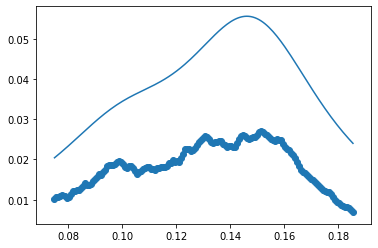

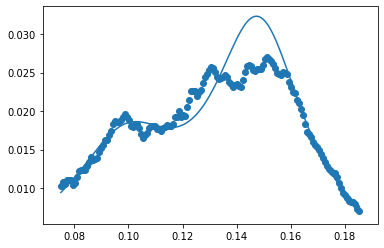

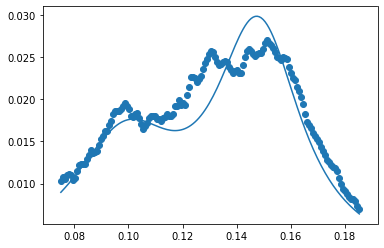

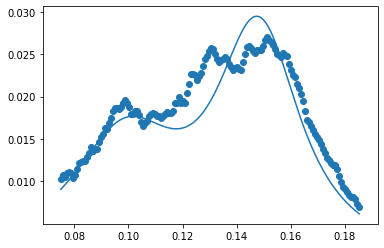

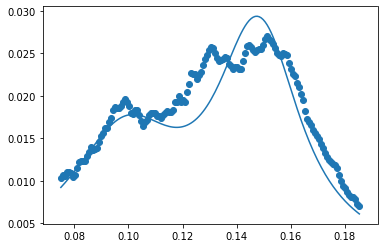

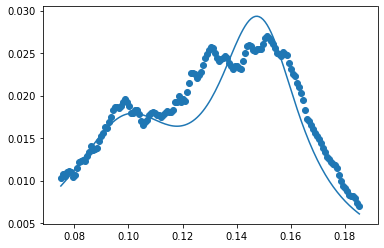

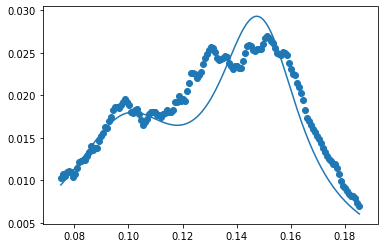

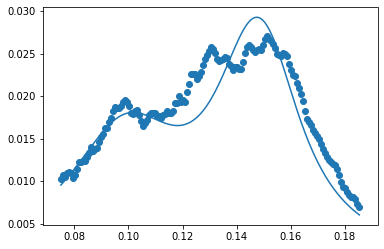

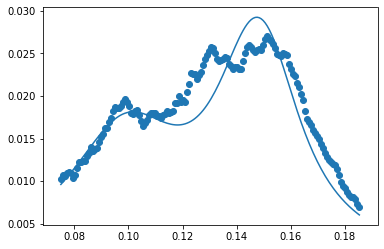

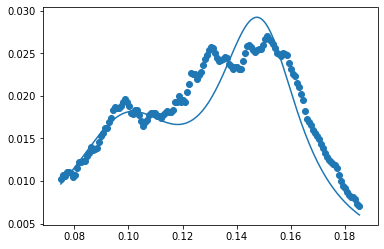

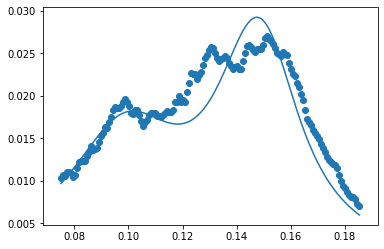

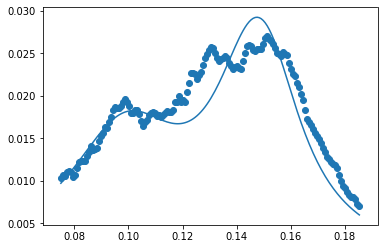

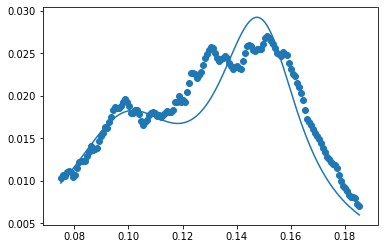

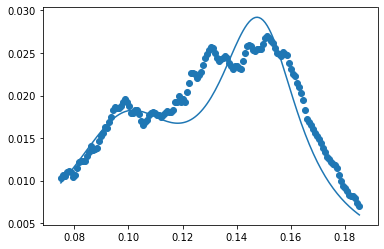

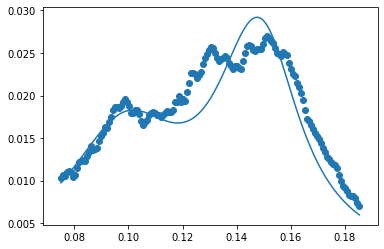

In [19]:
net=Lorent(15,0.3,23)
number=['0000']
'''for i in range(1000,3001,250):
    number.append(str(i))'''
'''number.append('3050')
number.append('3100')'''
for k in ['AL-B']:
    for j in number:
        try:
            name='3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j)
            net.DnumberP(name,1e-6)
        except Exception as e:
            pass

In [49]:
low=465
high=600
df=pd.read_table('3p1um-AL-A-10-1s-1000nm-Subtracted-NElectrons-SM.dat')
df.columns=['EEL','Intensity']
E=df['EEL'][low:high]
I=df['Intensity'][low:high]
xs=[0.1,0.133,0.15,0.18]
error=0.0004
for x in xs:
    for column in df['EEL']:
        if column>-error+x and column<x+error:
            y=E.values.tolist().index(column)
            print(y)
            break

19
63
86
127


In [13]:
import cv2
import numpy as np
import glob
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(151):
    for filename in glob.glob('Eqoche={}.png'.format(i)):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
out = cv2.VideoWriter('Final4.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

150

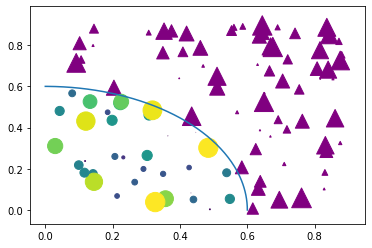

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c='purple')
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()